# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [2]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# your code here
xr = pd.read_csv('exch_rates.csv')

In [8]:
xr.Frequency = pd.to_datetime(xr.Frequency)
xr.set_index('Frequency', inplace = True)

In [9]:
xr.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

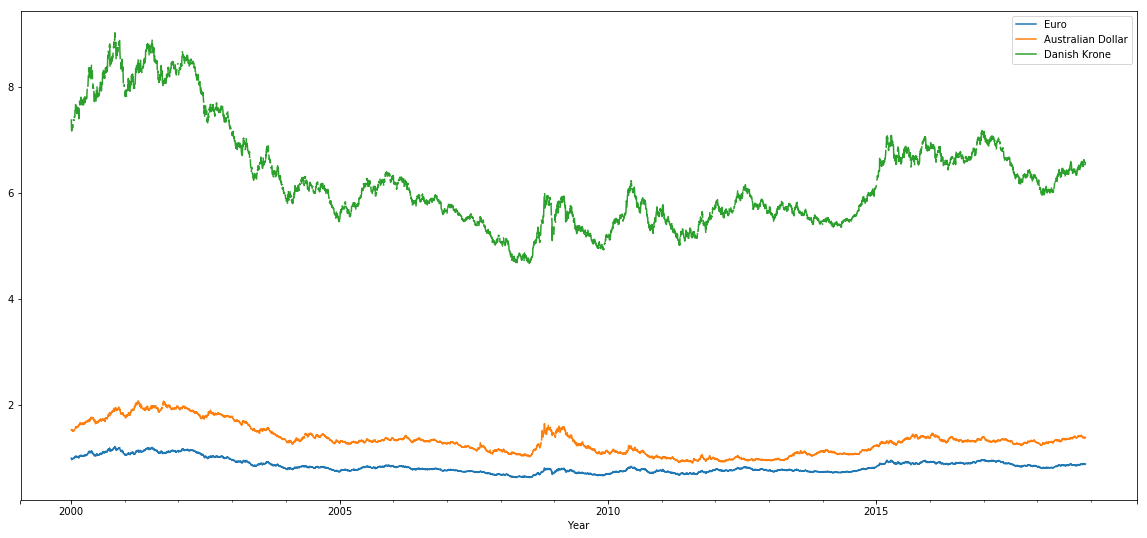

In [11]:
# your code here
xr.plot(figsize = (20,9))
plt.xlabel('Year')
plt.show()

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [12]:
# your code here
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

High correlation amongst all, although Danish Krone and Euro are perfectly correlated

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [13]:
# your code here
xr_diff = xr.diff(periods = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a129ef0>,
      dtype=object)

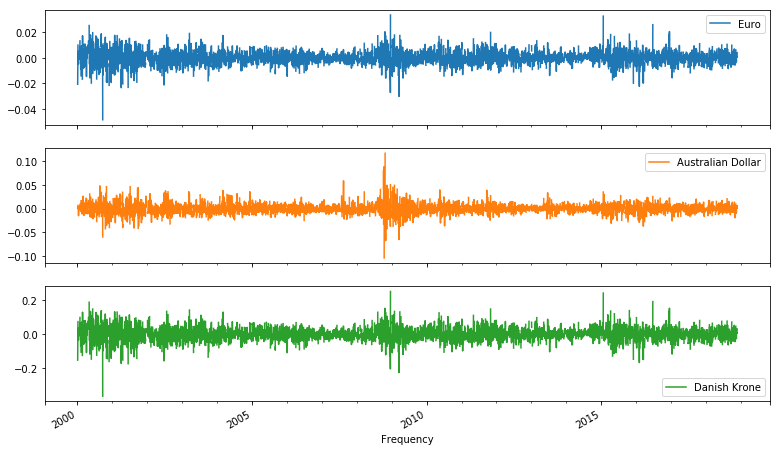

In [14]:
# your code here
xr_diff.plot(figsize = (13,8), subplots = True, legend = True)

In [15]:
# your code here
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Aus les correlated with other currencies, Euro and Krone still pegged

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [16]:
# your code here

euro = xr[['Euro']]

In [18]:
# your code here
euro_shift_1 = euro.shift(periods = 1)
euro_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


In [20]:
euro_lag_1 = pd.concat([euro, euro_shift_1], axis = 1)
euro_lag_1.columns = ['Original', 'Lag_1']

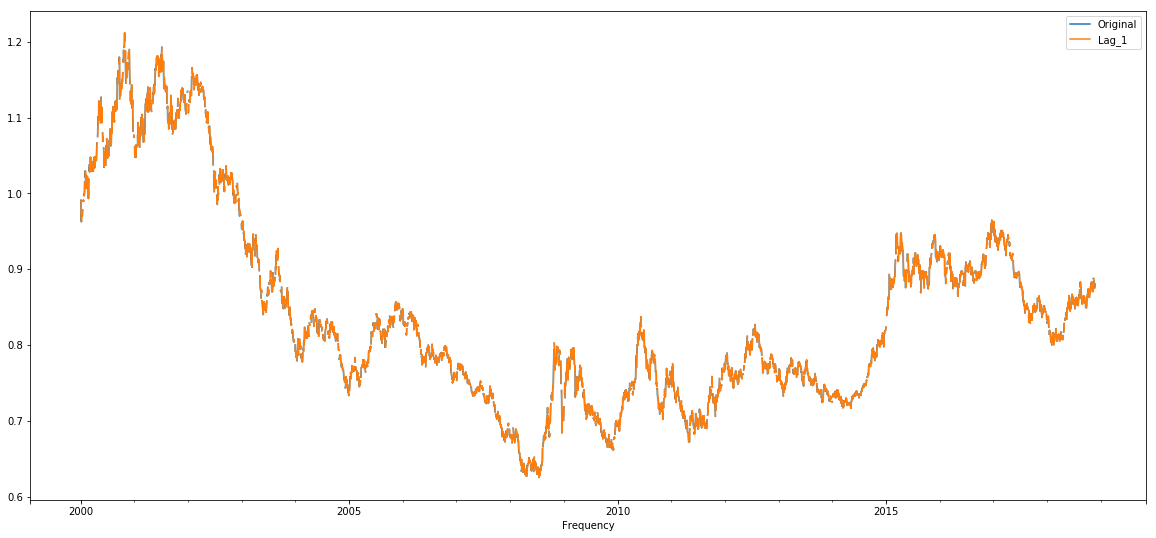

In [21]:
# your code here
euro_lag_1.plot(figsize = (20,9), legend = True)

In [22]:
euro_lag_1.corr()

,Original,Lag_1
Original,1.000000,0.999146
Lag_1,0.999146,1.000000


Repeat this, but for a "lag 50 autocorrelation"

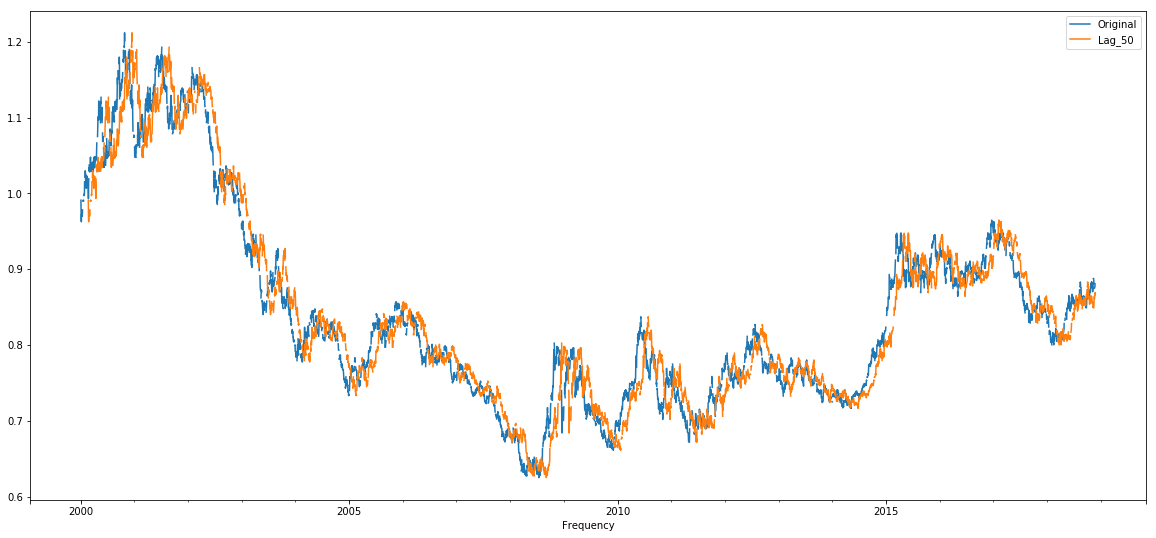

In [23]:
# your code here
euro_shift_50 = euro.shift(periods = 50)
euro_lag_50 = pd.concat([euro, euro_shift_50], axis = 1)
euro_lag_50.columns = ['Original', 'Lag_50']
euro_lag_50.plot(figsize = (20,9), legend = True)

In [24]:
# your code here
euro_lag_50.corr()

,Original,Lag_50
Original,1.000000,0.968321
Lag_50,0.968321,1.000000


### What's your conclusion here?

Correlation went down with greater lag, still very high correlation

Knowing this, let's plot the ACF now.

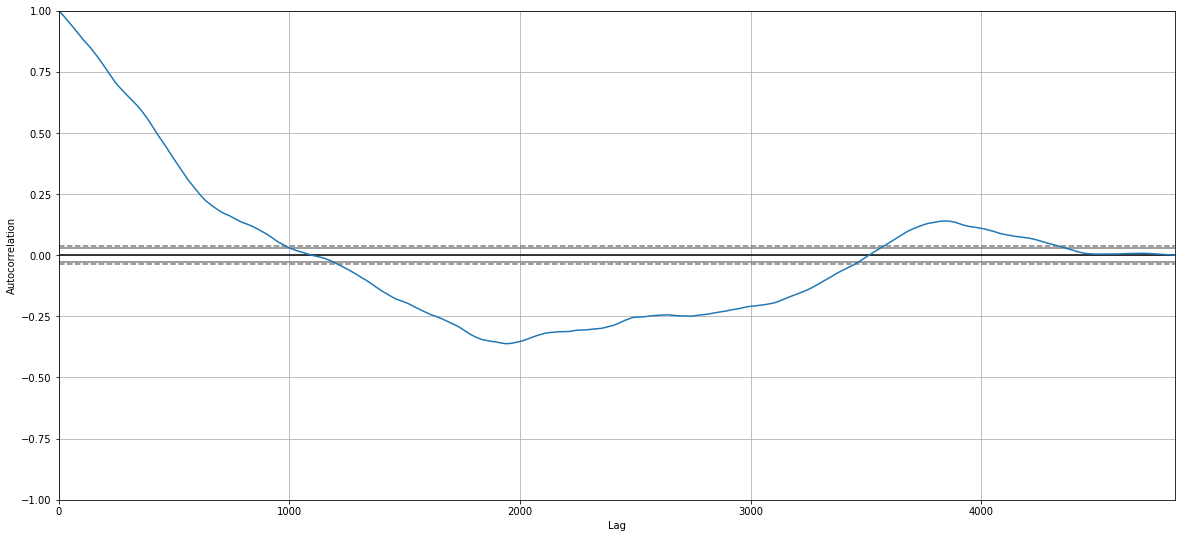

In [26]:
# your code here
plt.figure(figsize = (20,9))
pd.plotting.autocorrelation_plot(euro.dropna()); # semi-colon gets rid of object print at top

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

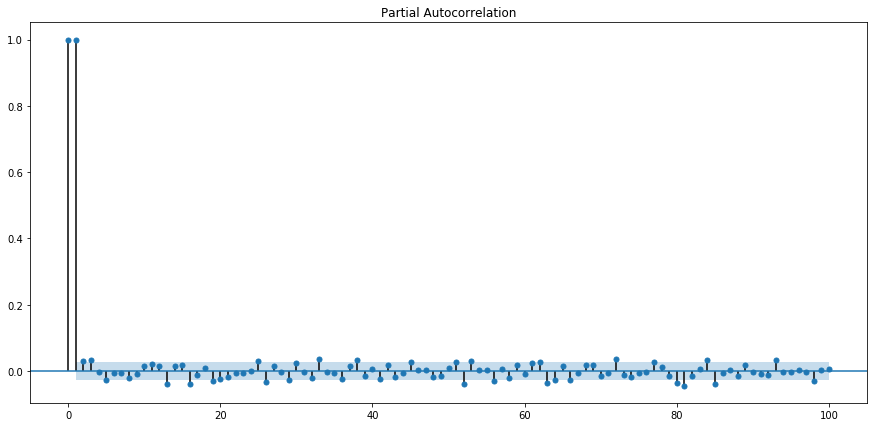

In [33]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15,7

plot_pacf(euro.dropna(), lags = 100); # Semi-colon prevents printing graph twice

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [70]:
# your code here
data = pd.read_csv('passengers.csv')
data.head()


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [71]:
# your code here
data.Month = pd.to_datetime(data['Month'])
data.set_index('Month', inplace = True)
data_diff = data.diff(periods = 1)

dfs = [data, data_diff]
titles = ['data', 'data_diff']

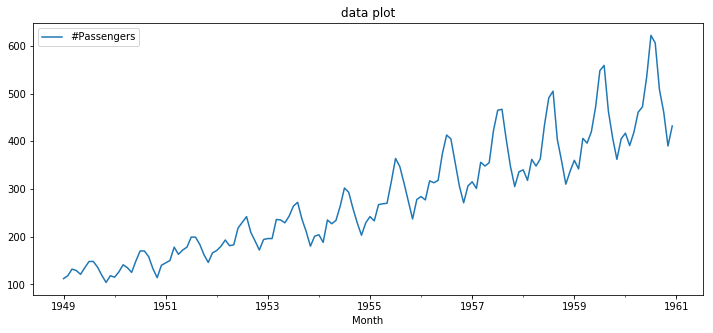

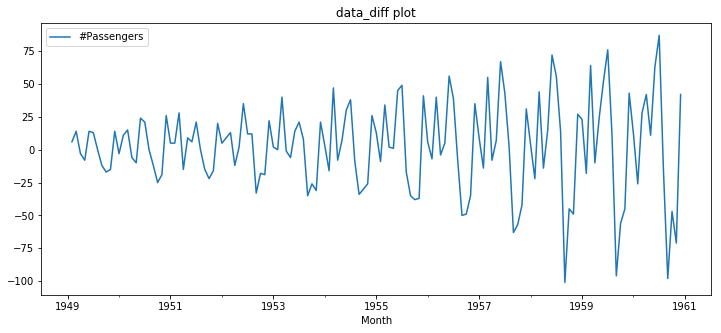

In [72]:
# your code here
for i in range(len(dfs)):
    dfs[i].plot(figsize = (12,5), legend = True)
    title = titles[i] + ' plot'
    plt.title(title)
    plt.show()

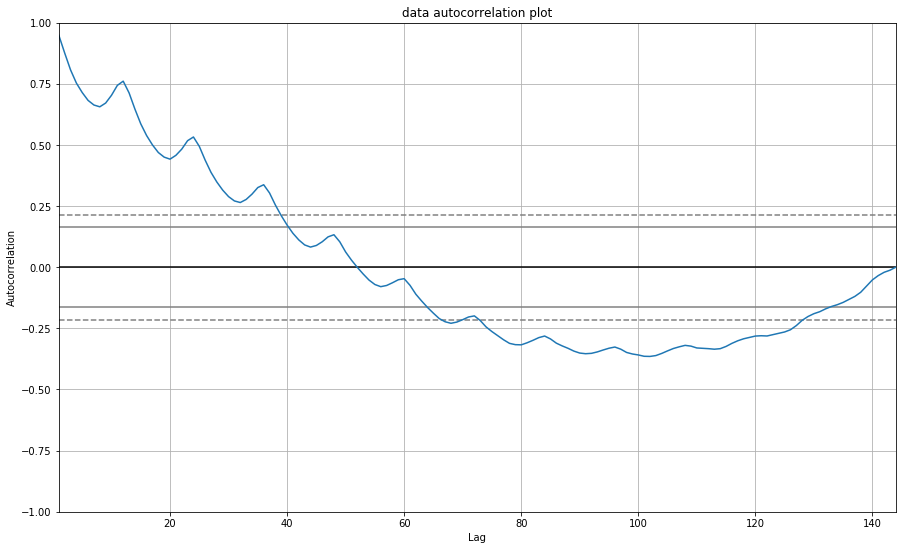

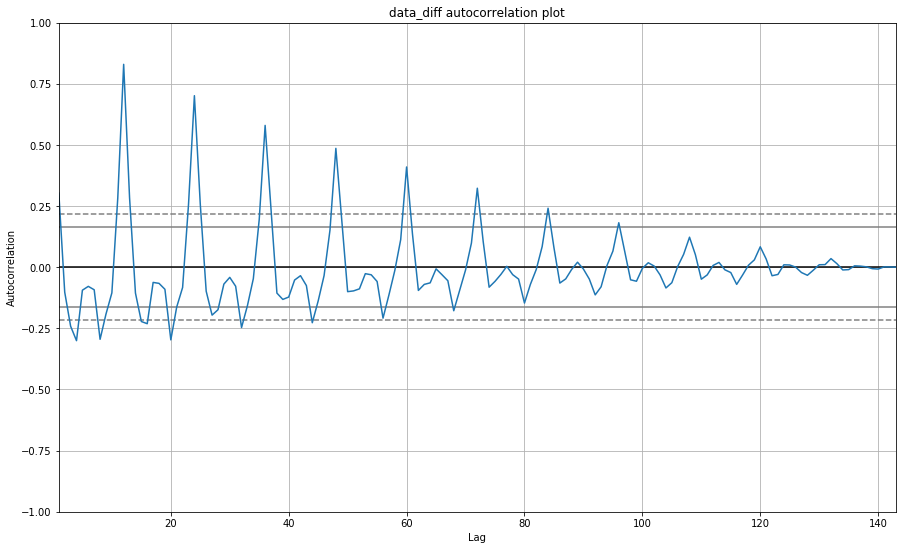

In [59]:
# your code here

for i in range(len(dfs)):
    plt.figure(figsize = (12,5))
    pd.plotting.autocorrelation_plot(dfs[i].dropna());
    title = titles[i] + ' autocorrelation plot'
    plt.title(title)
    plt.show()

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


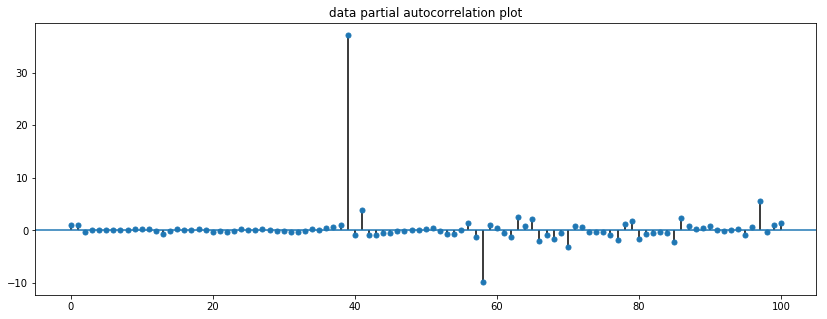

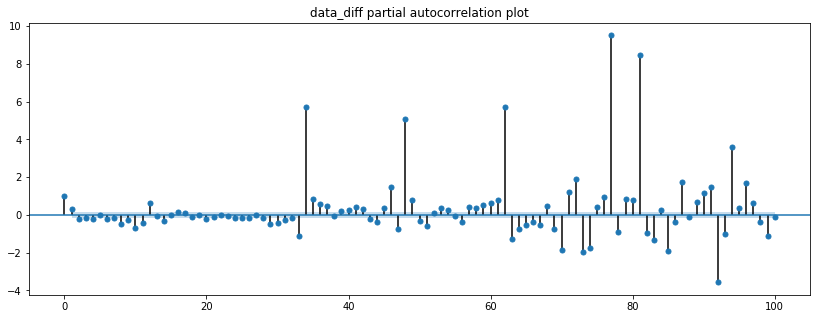

In [73]:
# your code here

for i in range(len(dfs)):
    
    df = dfs[i].dropna()
    plot_pacf(df, lags = 100);
    
    title = titles[i] + ' partial autocorrelation plot'
    plt.title(title)
    plt.show()

### Your conclusion here

Not sure why plot_pacf goes crazy at around 36 but within the normal range the only signficant lag is at around 12

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [77]:
# your code here
data = pd.read_csv('NYSE_monthly.csv')
data.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


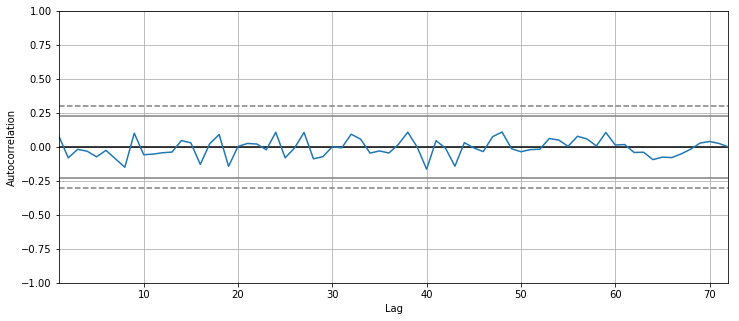

In [78]:
# your code here
data['Month'] = pd.to_datetime(data.Month)
data.set_index('Month', inplace = True)

plt.figure(figsize = (12,5))
pd.plotting.autocorrelation_plot(data.dropna());

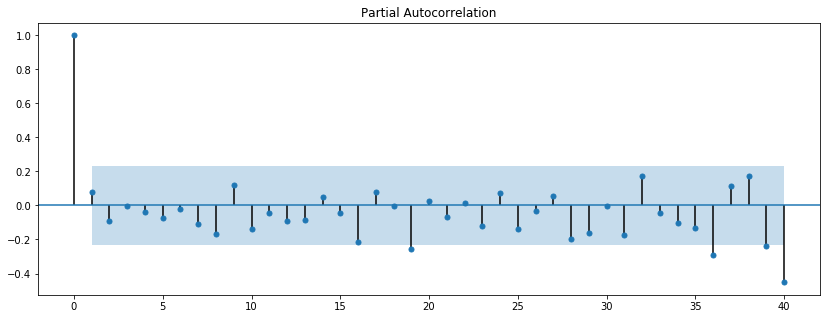

In [82]:
# your code here

plot_pacf(data.dropna(), lags = 40);

## Your conclusion here

Autocorrelation and partial autocorrelations are near zero - no trend or seasonality



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!